# Solution for "D&D.Sci April 2021: Voyages of the Gray Swan"

Source: https://www.lesswrong.com/posts/S3LKfRtYxhjXyWHgN/d-and-d-sci-april-2021-voyages-of-the-gray-swan

List of D&D.Sci tasks: https://www.lesswrong.com/posts/6QfatwCcmuaDBNeDv/d-and-d-sci-scenario-index

> **D&D.Sci April 2021: Voyages of the Gray Swan**
>
> by abstractapplic 
> 12th Apr 2021
>
> You were prepared for gratitude, a commendation from the Admiral, your own department, parades in your name. You were also prepared to hear that your ‘list of helpful suggestions for ensuring supply ships survive random encounters’ was an impudent insult to the collective intellect of High Command, and receive a public execution for your trouble. What you weren’t prepared for was what happened: being allocated a modest stipend, assigned to a vessel, and told that if you’re so clever you should implement your plans personally.
> 
> You have 100gp to spend, and your options are as follows:
> Coating the underside of the ship in shark repellent would ensure that no journey would feature shark attacks; however, Vaarsuvius’ Law (“every trip between plot-relevant locations will have exactly one random encounter”) means something else would attack instead.	40gp
> You’ve given up trying to understand what it is about woodwork that makes its practitioners so good at fighting Crabmonsters, but your findings are undeniable: arming the ship’s carpenters would halve the damage done by Crabmonster attacks.	20gp
> Offering tribute to the Merpeople would ensure they won’t attack the ship, similar to the effect of shark repellent.	45gp
> There’s enough space in the lower decks to add up to twenty more oars, so when fleeing is the best option, the entire crew can work together to escape. Each extra oar would decrease the damage done by Krakens and Demon Whales by 2%.	1gp/oar
> You wouldn’t think these ships could fit more artillery, but clever ergonomics allow you to add up to three more cannons. Your studies suggest each cannon would reduce the damage suffered in Nessie and Pirate attacks by 10%.	10gp/cannon
> Arming the Crow’s Nest with state-of-the-art rifles would give lookouts a 70% chance of ensuring a given Harpy attack does no damage.	35gp
> Giving the deck crew novelty foam swords to wield alongside their standard-issue cutlasses would improve their effectiveness when fighting Water Elementals, reducing the damage these creatures do by 60%.	15gp
> 
> You’re completely confident in the effectiveness of your ideas, but much less confident that you know which combination would make the best use of your limited budget. To investigate this angle, you’ve procured a record of random encounters encountered by the ships travelling your assigned route; unfortunately, it’s missing some important information for the ships that sank, due to everyone who could fill in those details being dead.
> 
> As you board the Gray Swan (why do they give these ships such charmingly unique names when they’re all built and operated identically?), it occurs to you that this might have been intended as an execution after all. The dataset suggests that without any of your clever plans, the survival rate for a journey along your route is a little below 90%, and the Gray Swan is scheduled to make ten trips – five northbound voyages, five southbound – in quick succession. Hopefully this indicates nothing more than your superiors wanting to test your interventions very very thoroughly.
> 
> Your top priority is to save your skin. Secondary priorities are minimizing total damage taken and spending as little gold as possible, to impress High Command and return to their good graces.
> 
> What will you do?
> 
> (Notes:
> As a passenger, you’ll be kept away from any fights, but the Gray Swan has no lifeboats; keeping the ship from sinking is necessary and sufficient to ensure your survival.
> Ships are fully repaired every time they make port.
> Interventions stack such that two 10% reductions are equivalent to one 20% reduction.
> Interventions apply such that a 10% reduction to an attack that would do 80% damage does 72% damage instead.
> Each journey takes a month; it is currently Month 5, Year 1406.)


## 1. Exploration and analysis.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('./source/dset.csv')

print("data.info():")
print(data.info())

print("\ndata.describe():")
print(data.describe())

data.head()


data.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21795 entries, 0 to 21794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   damage taken        21795 non-null  object
 1   direction           21795 non-null  object
 2   encounter           21795 non-null  object
 3   month of departure  21795 non-null  object
dtypes: object(4)
memory usage: 681.2+ KB
None

data.describe():
       damage taken   direction encounter month of departure
count         21795       21795     21795              21795
unique          101           2        10                120
top           100%+  southbound   pirates             2/1405
freq           2367       10918      5506                194


,damage taken,direction,encounter,month of departure
0,35%,southbound,crabmonsters,1/1396
1,49%,southbound,kraken,1/1396
2,52%,northbound,pirates,1/1396
3,18%,southbound,pirates,1/1396
4,51%,northbound,merpeople,1/1396


In [3]:
data.rename(
    columns={
        'damage taken': 'damage',
        'month of departure': 'date'
    },
    inplace = True
)

data['damage'] = data['damage'].apply( lambda s: float(s.strip('%+')) )
data['month'] = data['date'].apply( lambda s: int(s.split('/')[0]) )
data['year'] = data['date'].apply( lambda s: int(s.split('/')[1]) )
data['date'] = data['date'].apply( lambda s: s.split('/')[1] + '-' + s.split('/')[0] )

data.head()

,damage,direction,encounter,date,month,year
0,35.0,southbound,crabmonsters,1396-1,1,1396
1,49.0,southbound,kraken,1396-1,1,1396
2,52.0,northbound,pirates,1396-1,1,1396
3,18.0,southbound,pirates,1396-1,1,1396
4,51.0,northbound,merpeople,1396-1,1,1396


In [4]:
print('Dataset unique values:')
print(data.nunique(),"\n")

for col in ['direction', 'encounter', 'month']:
    print(f'"{col}": {data[col].unique()}')

Dataset unique values:
damage       101
direction      2
encounter     10
date         120
month         12
year          10
dtype: int64 

"direction": ['southbound' 'northbound']
"encounter": ['crabmonsters' 'kraken' 'pirates' 'merpeople' 'harpy' 'water elemental'
 'sharks' 'unknown' 'nessie' 'demon whale']
"month": [ 1  2  3  4  5  6  7  8  9 10 11 12]


### Single-feature analysis

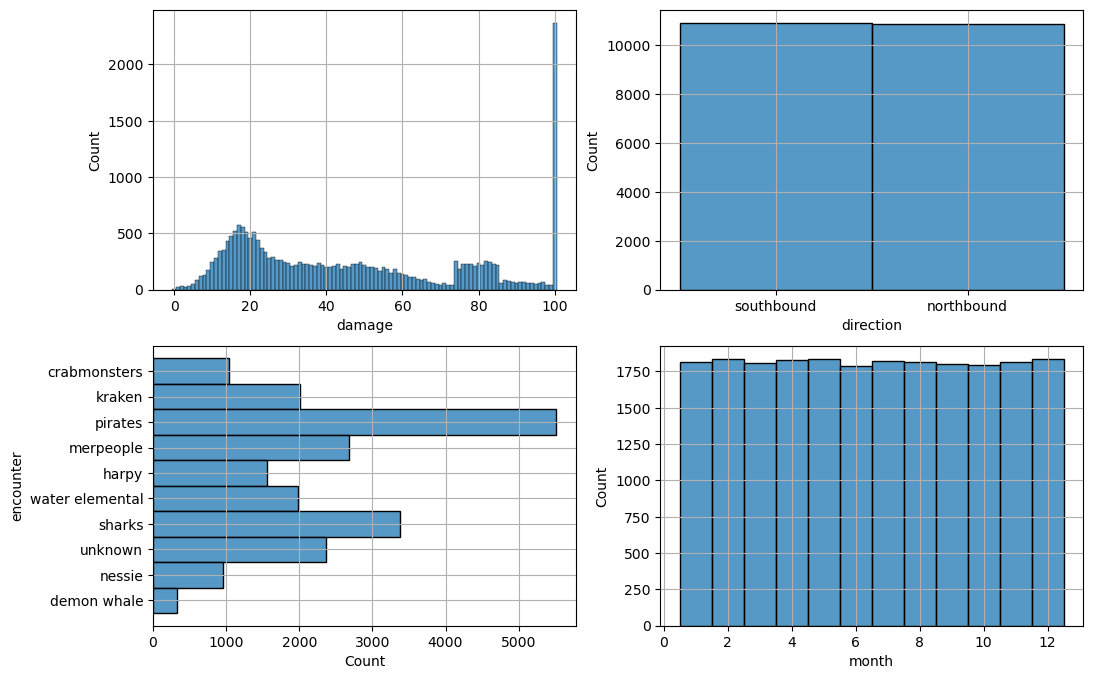

In [5]:
features = ['damage', 'direction', 'encounter', 'month']

plt.figure(figsize=(12,8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    if features[i] == 'encounter':
        sns.histplot(data=data, y=features[i], discrete=True)
    else:
        sns.histplot(data=data, x=features[i], discrete=True)
    plt.grid()

plt.show()


**Observation #1: Voyages are uniformly distributed by months and directions. There is a distinct peak in the damage distribution at 100%+ which corresponds to sunk ships.**

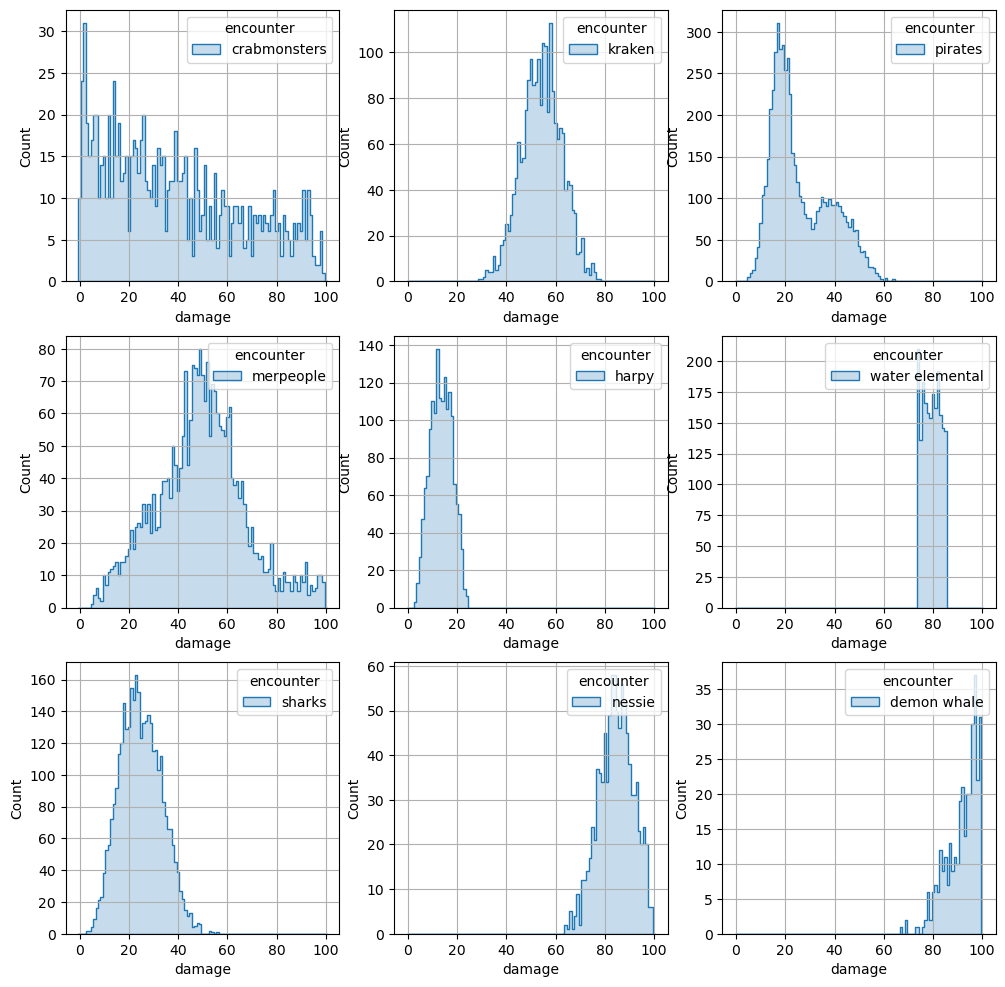

In [6]:
encounters = data['encounter'].unique().tolist()
encounters.pop( encounters.index('unknown') )

plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot( 3, 3, i + 1  )
    sns.histplot(data=data[data['encounter']==encounters[i]], x='damage', discrete=True, binrange=(0, 100), element='step', hue='encounter')
    # plt.title(encounters[i])
    plt.grid()

plt.show()

**Observation #2: It seems that the only candidates for lethal encounters are: crabmonsters, merpeople, nessie, and demon whale.**

There is a risk, that there are some invisible peaks in damage probability distributions that are positioned to the right of 100%, but we don't have any information to guess where they are and how significant they might be. Because of that, from now on we will limit our analysis to these 4 types of encounters.

Judging by the probability distributions of damage shown above, only these 4 types of interventions could actually be useful:

1. (20 gp) Carpenters. -50% damage from crabmonsters
2. (up to 20 gp) Up to 20 oars. Up to -40% damage from demon whales (and krakens, but they seem irrelevant)
3. (up to 30 gp) Up to 3 artillery. Up to -30% damage from nessie (and pirates, but they also seem irrelevant). From the shape of the distribution for nessie we can guess that more than 1 artillery would actually be an overkill.
4. (45 gp) Merpeople tribute. Trading merpeople attacks with some other random attacks.

All other interventions seem to be useless.

Unfortunately, we don't have enough money to apply all of these interventions. Another important consideration is that buying off the merpeople would result in higher probability of other deadly encounters, therefore we need some statistical model to make a decision.

### Formulating a statistical model

Our main focus should be estimating sizes of unknown tails of the distributions on the right of 100% damage. Let's try to come up with some statistical model for this task. 

Let's call $\alpha_\mathbf{x}$ a probability to have a record of an encounter $\mathbf{x}$. We focus primarily on $\alpha_\mathbf{c}$ for crabmonsters, $\alpha_\mathbf{m}$ for merpeople, $\alpha_\mathbf{n}$ for nessie and $\alpha_\mathbf{d}$ for demon whales. There is also a chance that the ship will sink and we will have an "unknown" recorded as an encounter - we will use $\alpha_\mathbf{u}$ for such cases.

The last value, $\alpha_\mathbf{u}$, consists of 4 parts, that correspond to actual encounters with one of 4 deadly types (theoretically, some other types of encounters could also be deadly, but there is no way we could deduce it from the available data):

$$
\alpha_\mathbf{u} = \delta_\mathbf{c} + \delta_\mathbf{m} + \delta_\mathbf{n} + \delta_\mathbf{d}
$$

Fractions for actual encounters would be: 

$$
\beta_\mathrm{x} = \alpha_\mathrm{x} + \delta_\mathrm{x}
$$

If we can estimate tail sizes, we could introduce new values: $\gamma_\mathrm{x}$, which correspond to fraction of encounters of a specific type that resulted in sinking. 

$$
\gamma_\mathrm{x} = \frac{\delta_\mathrm{x}}{\beta_\mathrm{x}} = \frac{\delta_\mathrm{x}}{\alpha_\mathrm{x} + \delta_\mathrm{x}} ; 
\qquad \delta_\mathrm{x} = \frac{\gamma_\mathrm{x}\alpha_\mathrm{x}}{1-\gamma_\mathrm{x}}
$$

We can hypothesize that probability density for damage by crabmonsters looks like exponential, for nessie and for demon whales - like normal. Probability distribution for merpeople appears irregular, making it challenging to estimate the tail size based on the visible part of the distribution. But size of the tail for this particular distribution could be estimated as $\alpha_\mathbf{u} - \delta_\mathbf{c} - \delta_\mathbf{n} - \delta_\mathbf{d}$

In [7]:
alpha_c = (data['encounter']=='crabmonsters').sum() / data.shape[0]
alpha_m = (data['encounter']=='merpeople').sum() / data.shape[0]
alpha_n = (data['encounter']=='nessie').sum() / data.shape[0]
alpha_d = (data['encounter']=='demon whale').sum() / data.shape[0]
alpha_u = (data['encounter']=='unknown').sum() / data.shape[0]

print(f"{alpha_c = :.3}; {alpha_m = :.3}; {alpha_n = :.3}; {alpha_d = :.3}; {alpha_u = :.3}")

alpha_c = 0.0478; alpha_m = 0.123; alpha_n = 0.0439; alpha_d = 0.0152; alpha_u = 0.109


### Checking for dependence on voyage direction, seasonality, and absence of time trends

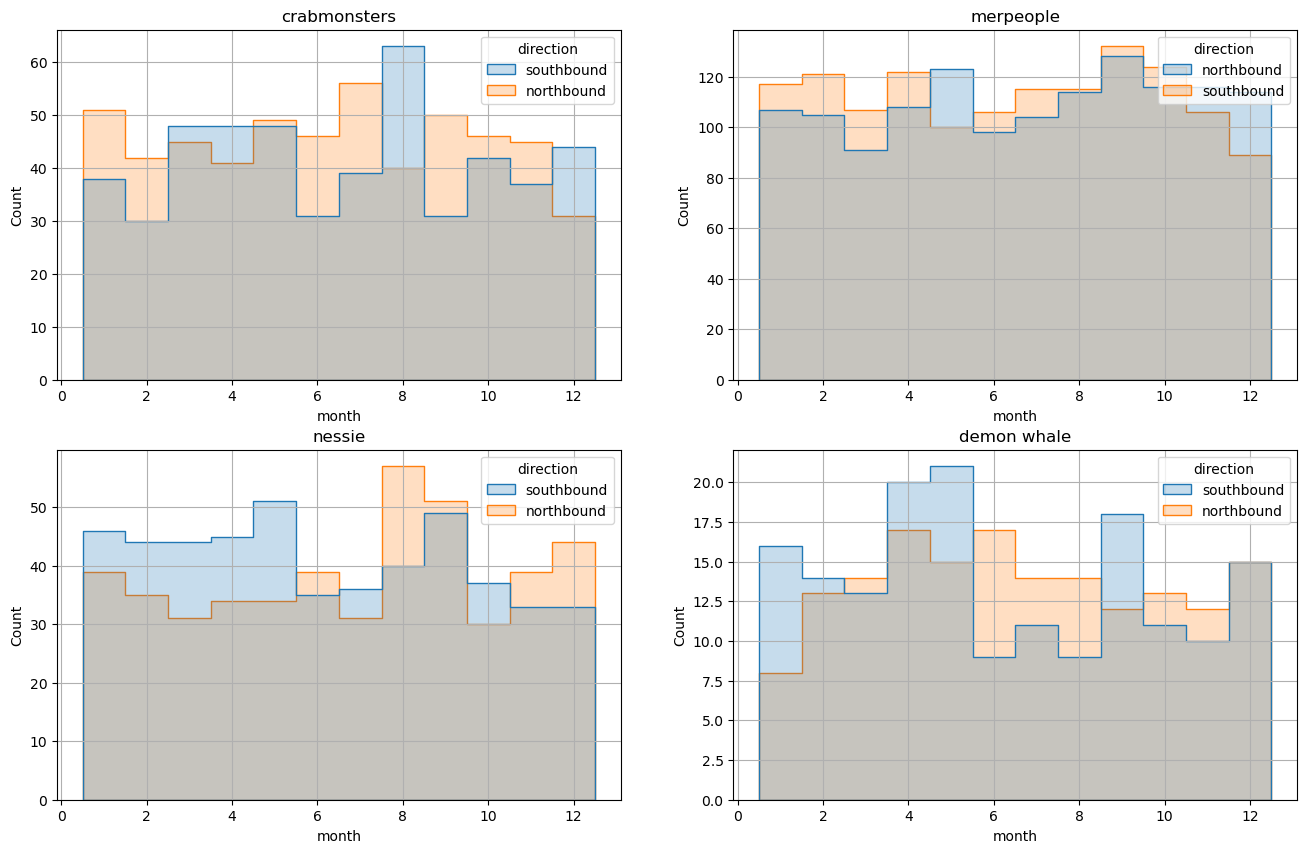

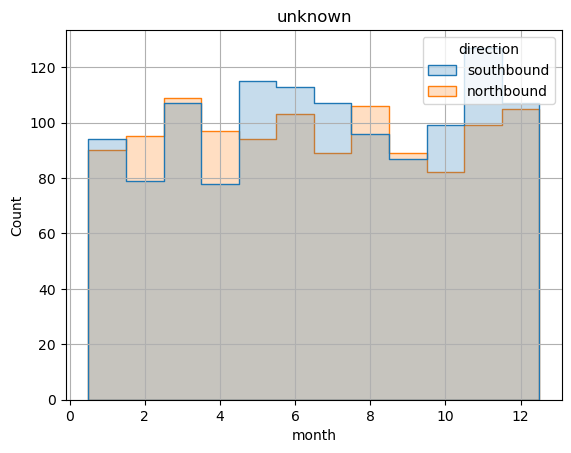

In [8]:
plt.figure(figsize=(16,10))

target_encounters = ['crabmonsters', 'merpeople', 'nessie', 'demon whale']

for i in range(4):
    plt.subplot( 2, 2, i + 1  )
    sns.histplot(data=data[data['encounter']==target_encounters[i]], x='month', discrete=True, element='step', hue='direction')
    plt.title(target_encounters[i])
    plt.grid()

plt.show()

sns.histplot(data=data[data['encounter']=='unknown'], x='month', discrete=True, element='step', hue='direction')
plt.title("unknown")
plt.grid(); plt.show()

**Observation #3. There are some seasonal variations in potentially deadly encounter types, especially for demon whales and Nessies, that may or may not be attributable to random effects.**

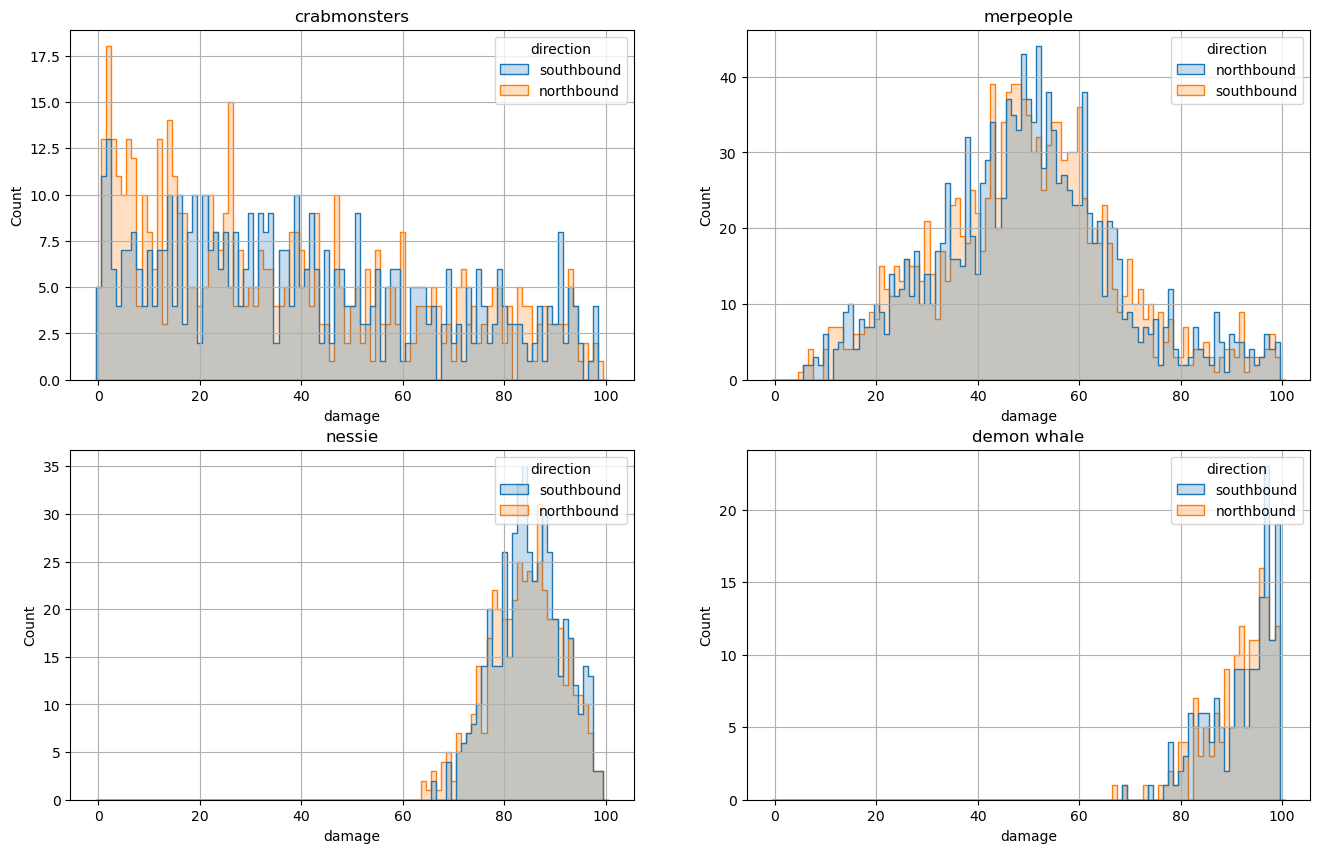

In [9]:
plt.figure(figsize=(16,10))

target_encounters = ['crabmonsters', 'merpeople', 'nessie', 'demon whale']

for i in range(4):
    plt.subplot( 2, 2, i + 1  )
    sns.histplot(data=data[data['encounter']==target_encounters[i]], x='damage', discrete=True, binrange=(0, 100), element='step', hue='direction')
    plt.title(target_encounters[i])
    plt.grid()

plt.show()

**Observation #4. Probability distributions for southbound and northbound voyages appear similar.**

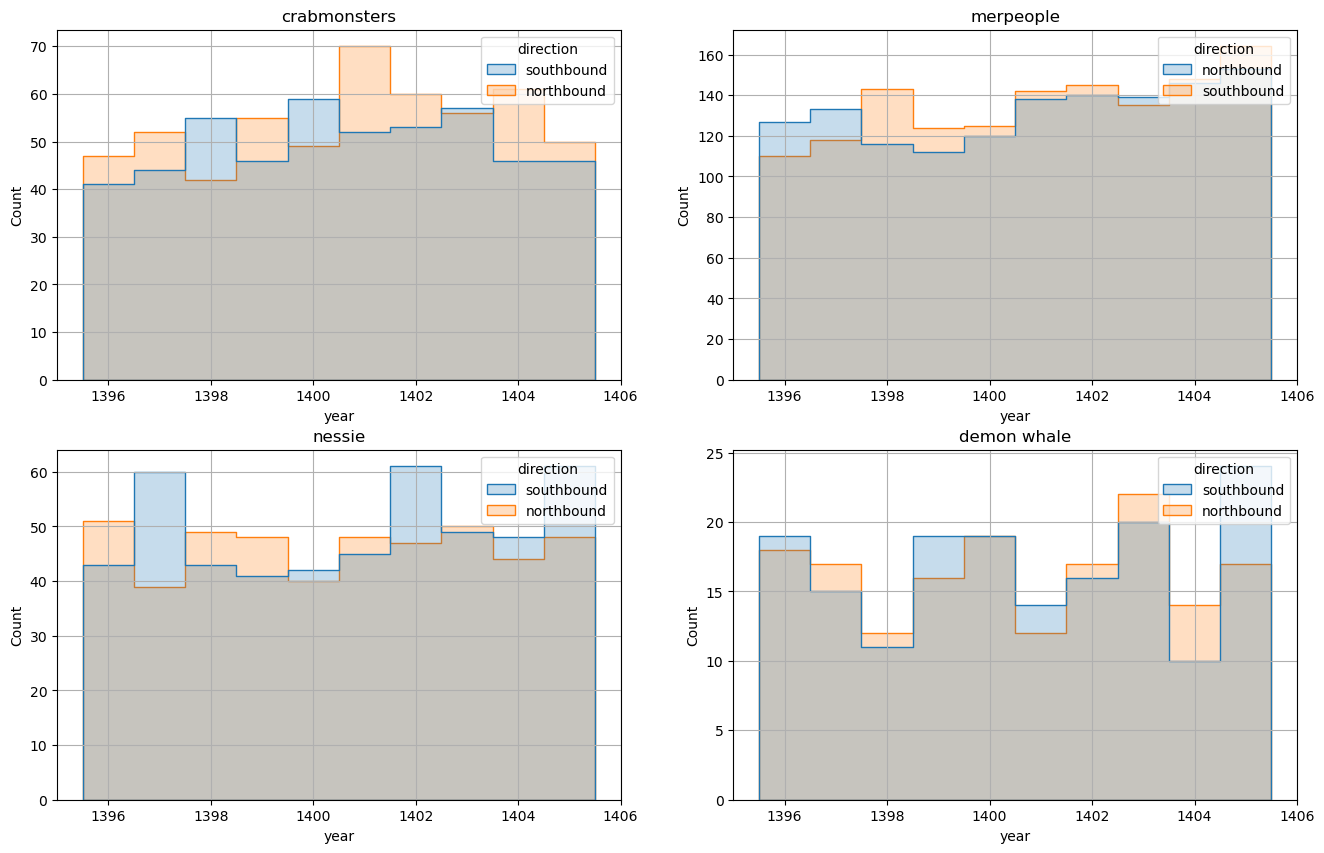

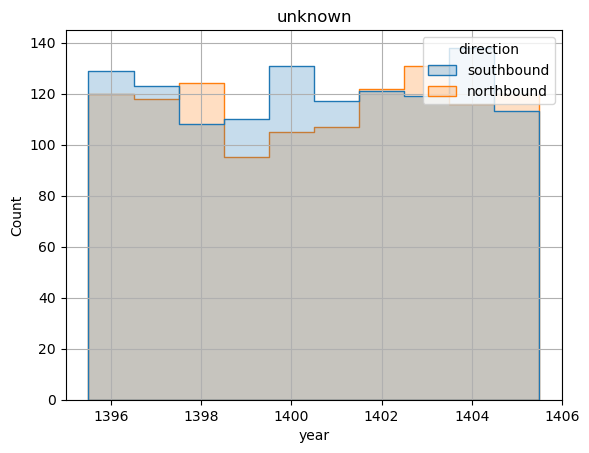

In [10]:
plt.figure(figsize=(16,10))

target_encounters = ['crabmonsters', 'merpeople', 'nessie', 'demon whale']

for i in range(4):
    plt.subplot( 2, 2, i + 1  )
    sns.histplot(data=data[data['encounter']==target_encounters[i]], x='year', discrete=True, element='step', hue='direction')
    plt.title(target_encounters[i])
    plt.grid()

plt.show()

sns.histplot(data=data[data['encounter']=='unknown'], x='year', discrete=True, element='step', hue='direction')
plt.title("unknown")
plt.grid(); plt.show()

**Observation #5. There are no visible trends in the frequency of deadly encounter types.**

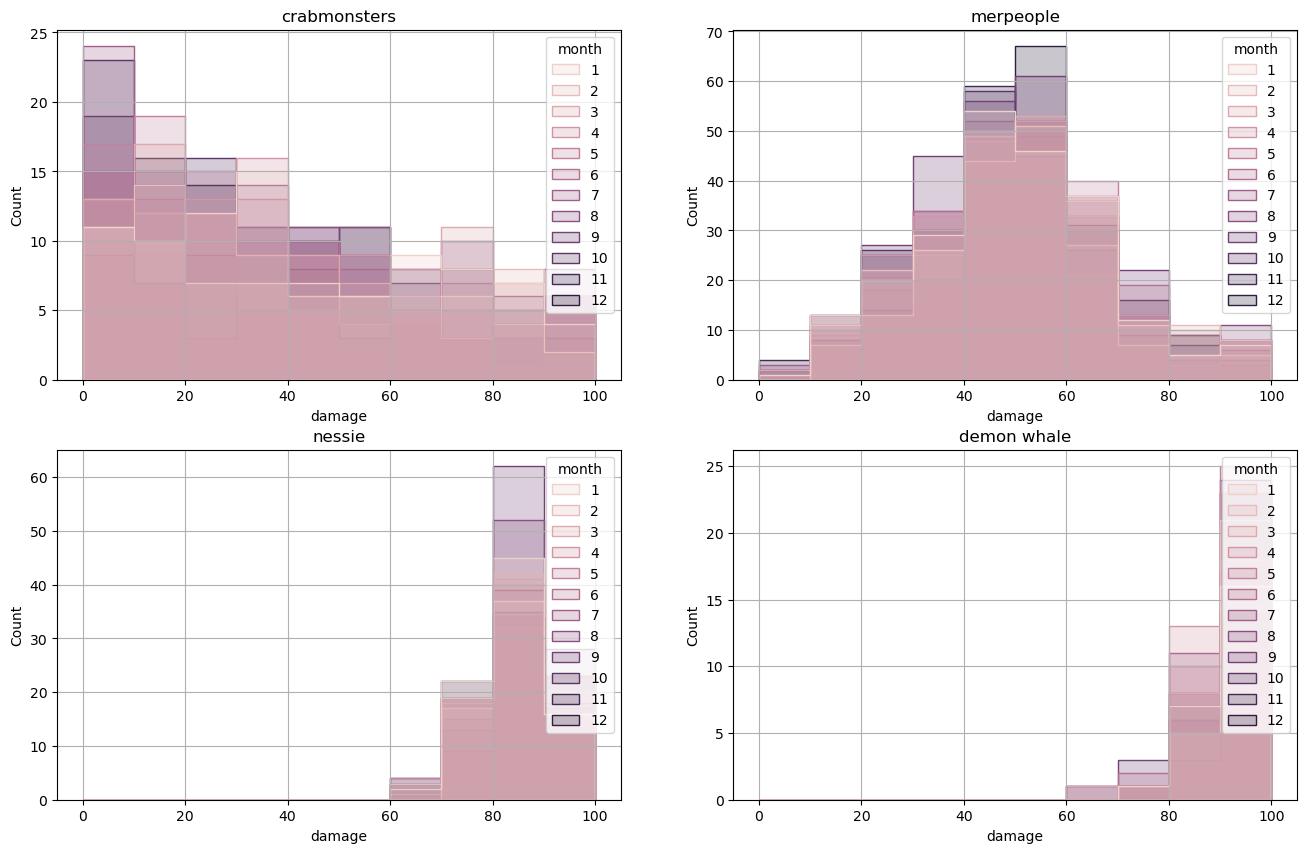

In [11]:
plt.figure(figsize=(16,10))

target_encounters = ['crabmonsters', 'merpeople', 'nessie', 'demon whale']

for i in range(4):
    plt.subplot( 2, 2, i + 1  )
    sns.histplot(data=data[data['encounter']==target_encounters[i]], x='damage', binwidth=10, binrange=(0, 100), element='step', hue='month')
    plt.title(target_encounters[i])
    plt.grid()

plt.show()

### Estimating tail sizes and intervention effectiveness

#### 1. Crabmonsters

Damage distribution by crabmonsters looks like an exponential one. Let's fit a truncated exponential distribution to the corresponding data. This will give us parameter scale=$\sigma$ for the damage distribution:

$$
p(x) = \frac{\exp(-x/\sigma)}{\sigma}
$$

and the corresponding fraction of the tail distribution would be

$$
\gamma_\mathrm{c} = \exp(-D/\sigma)
$$
where $D=100$ is a damage threshold.

$\gamma_\mathrm{c}$ is probability that ship will sink given it encounters a crabmonster. We can also calculate the effectiveness of the "carpenters" intervention in terms of $\gamma_\mathrm{c}$ reduction. Note that it halves damage from crabmonsters, meaning that we could take initial damage of $2D$ instead of just $D$:

$$
\gamma_\mathrm{c}^*=\exp(-2D/\sigma)
$$

The actual effectiveness of this interventions could be defined as decrease in overall probability of sinking, which is

$$
\varepsilon_c = \delta_\mathrm{c} - \delta_\mathrm{c}^* = 
\beta_\mathrm{c} \left( \gamma_\mathrm{c} - \gamma_\mathrm{c}^* \right) = 
\alpha_\mathrm{c} \frac{\gamma_\mathrm{c}-\gamma_\mathrm{c}^*}{1-\gamma_\mathrm{c}}
$$

In [12]:
from scipy.stats import truncexpon, expon
from math import exp

crabmonsters_damage = data[data['encounter']=='crabmonsters']['damage']

b, loc, sigma = truncexpon.fit(crabmonsters_damage, floc=0)
print(f"{b=:.4}; {loc=}; {sigma=:.4}")

gamma_c = exp(-100/sigma)
gamma_c_x = exp(-2*100/sigma)
epsilon_c = alpha_c * (gamma_c - gamma_c_x) / ( 1 - gamma_c )
delta_c = alpha_c * gamma_c / ( 1 - gamma_c )

print(f"{gamma_c = :.3}; {gamma_c_x = :.3}; {delta_c = :.3}")
print(f"{epsilon_c = :.3}")
print(f"check gamma_c: {1-expon.cdf(100, loc=0, scale=sigma):.3}; check_gamma_c_x: {1-expon.cdf(200, loc=0, scale=sigma):.3}")

b=0.9734; loc=0; sigma=101.7
gamma_c = 0.374; gamma_c_x = 0.14; delta_c = 0.0285
epsilon_c = 0.0179
check gamma_c: 0.374; check_gamma_c_x: 0.14


**Result #1. Estimated effectiveness of carpenters (intervention against crabmonsters, overall lethality reduction):**

$1.79\%$ (costs 20 gp)

Here is a comparison of the actual damage distribution from encounters with crabmonsters and the modeled distribution function:

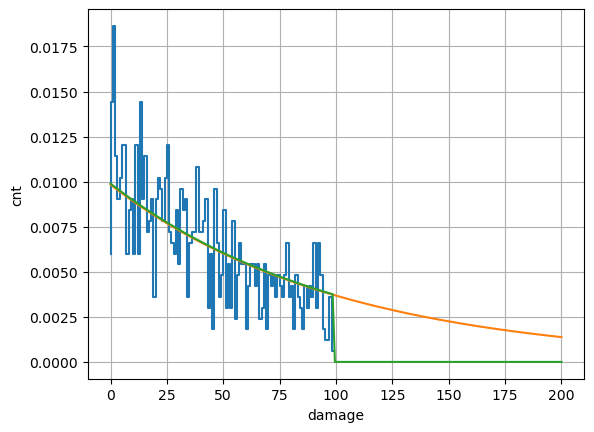

In [13]:
x = np.linspace(0, 200, 200)
pdf = expon.pdf(x, loc=loc, scale=sigma)
pdf_trunc = truncexpon.pdf(x, b=b, loc=loc, scale=sigma) * (1-gamma_c)

d = data[data['encounter']=='crabmonsters'].groupby('damage').agg(cnt=('direction','count'))['cnt']/(data['encounter']=='crabmonsters').sum() * (1-gamma_c)

sns.lineplot(d,drawstyle='steps-pre')
sns.lineplot(pd.Series(index=x, data=pdf))
sns.lineplot(pd.Series(index=x, data=pdf_trunc))
plt.grid()

#### 2. Nessie

The damage distribution for Nessie encounters resembles the bell shape of a normal distribution. We will repeat the calculations used for crabmonsters, but this time fit a normal distribution instead of an exponential one.

-1221.6414450909251 2021.4970153837453 84.4493223761141 6.962865952803022
gamma_n = 0.0128; left_tail = 3.73e-34; delta_n = 0.000568
gamma_n_x1 = 6.43e-05; gamma_n_x2 = 2.88e-09; gamma_n_x3 = 0.0
epsilon_n_1 = 0.000565; epsilon_n_2 = 0.000568; epsilon_n_3 = 0.000568
Incremental effectiveness of the second cannon: d_eps_2 = 2.86e-06
Incremental effectiveness of the third cannon:  d_eps_3 = 1.28e-10


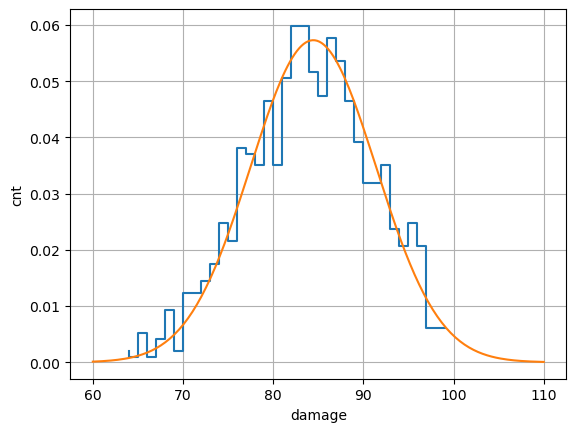

In [14]:
from scipy.stats import truncnorm, norm

nessie_damage = data[data['encounter']=='nessie']['damage']

a, b, mu, sigma = truncnorm.fit(nessie_damage)
print(a,b,mu,sigma)

x = np.linspace(60, 110, 200)
pdf = norm.pdf(x, loc=mu, scale=sigma)

gamma_n = 1 - norm.cdf(100, loc=mu, scale=sigma)
gamma_n_x1 = 1 - norm.cdf(100 / 0.9, loc=mu, scale=sigma)
gamma_n_x2 = 1 - norm.cdf(100 / 0.8, loc=mu, scale=sigma)
gamma_n_x3 = 1 - norm.cdf(100 / 0.7, loc=mu, scale=sigma)

epsilon_n_1 = alpha_n * (gamma_n - gamma_n_x1) / (1-gamma_n)
epsilon_n_2 = alpha_n * (gamma_n - gamma_n_x2) / (1-gamma_n)
epsilon_n_3 = alpha_n * (gamma_n - gamma_n_x3) / (1-gamma_n)
d_eps_2 = epsilon_n_2 - epsilon_n_1
d_eps_3 = epsilon_n_3 - epsilon_n_2

delta_n = alpha_n * gamma_n / ( 1 - gamma_n )

left_tail = norm.cdf(0, loc=mu, scale=sigma)
print(f"{gamma_n = :.3}; {left_tail = :.3}; {delta_n = :.3}")
print(f"{gamma_n_x1 = :.3}; {gamma_n_x2 = :.3}; {gamma_n_x3 = :.3}")
print(f"{epsilon_n_1 = :.3}; {epsilon_n_2 = :.3}; {epsilon_n_3 = :.3}")
print(f"Incremental effectiveness of the second cannon: {d_eps_2 = :.3}")
print(f"Incremental effectiveness of the third cannon:  {d_eps_3 = :.3}")

d = data[data['encounter']=='nessie'].groupby('damage').agg(cnt=('direction','count'))['cnt']/(data['encounter']=='nessie').sum() * ( 1 - gamma_n - left_tail)

sns.lineplot(d,drawstyle='steps-pre')
sns.lineplot(pd.Series(index=x, data=pdf))
plt.grid()

**Result 2. Incremental effeciveness of the first, second, and third cannons:**

1) $0.057\%$ (10 gp)

2) $2.86 \cdot 10^{-4}\%$ (10 gp)

3) $1.28 \cdot 10^{-8}\%$ (10 gp)

#### 3. Demon Whales

Although the shape of the damage distribution for demon whales is unclear, let's attempt to fit a normal distribution curve.


-33.73406285489724 -1.007899508241548 13.530011852449135 14.416131502696906
gamma_d = 0.826; gamma_d_x5 = 0.567; gamma_d_x10 = 0.213; gamma_d_x15 = 0.021; gamma_d_x20 = 0.000114
delta_d = 0.0721
epsilon_d_5 = 0.0226; d_eps_5_10 = 0.0309; d_eps_10_15 = 0.0168; d_eps_15_20 = 0.00182


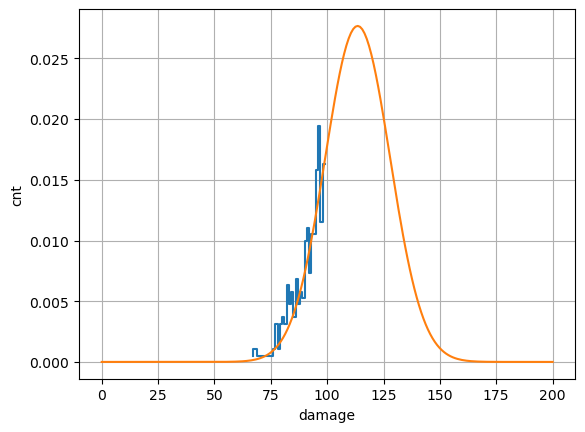

In [15]:
demon_damage = data[data['encounter']=='demon whale']['damage']

xdelta = 100

a, b, mu, sigma = truncnorm.fit(demon_damage-100)
print(a,b,mu,sigma)


x = np.linspace(0, 200, 200)
# pdf = truncnorm.pdf(x, a=a,b=b, loc=mu+100, scale=sigma)
pdf = norm.pdf(x, loc=mu+xdelta, scale=sigma)

gamma_d = 1 - norm.cdf(xdelta, loc=mu + xdelta, scale=sigma)
gamma_d_x5 = 1 - norm.cdf(xdelta/0.9, loc=mu + xdelta, scale=sigma)
gamma_d_x10 = 1 - norm.cdf(xdelta/0.8, loc=mu + xdelta, scale=sigma)
gamma_d_x15 = 1 - norm.cdf(xdelta/0.7, loc=mu + xdelta, scale=sigma)
gamma_d_x20 = 1 - norm.cdf(xdelta/0.6, loc=mu + xdelta, scale=sigma)

epsilon_d_5 = alpha_d * (gamma_d - gamma_d_x5) / (1-gamma_d)
epsilon_d_10 = alpha_d * (gamma_d - gamma_d_x10) / (1-gamma_d)
epsilon_d_15 = alpha_d * (gamma_d - gamma_d_x15) / (1-gamma_d)
epsilon_d_20 = alpha_d * (gamma_d - gamma_d_x20) / (1-gamma_d)

d_eps_5_10 = epsilon_d_10 - epsilon_d_5
d_eps_10_15 = epsilon_d_15 - epsilon_d_10
d_eps_15_20 =  epsilon_d_20 - epsilon_d_15

delta_d = alpha_d * gamma_d / ( 1 - gamma_d )

print(f"{gamma_d = :.3}; {gamma_d_x5 = :.3}; {gamma_d_x10 = :.3}; {gamma_d_x15 = :.3}; {gamma_d_x20 = :.3}")
print(f"{delta_d = :.3}")
print(f"{epsilon_d_5 = :.3}; {d_eps_5_10 = :.3}; {d_eps_10_15 = :.3}; {d_eps_15_20 = :.3}")


d = data[data['encounter']=='demon whale'].groupby('damage').agg(cnt=('direction','count'))['cnt']/(data['encounter']=='demon whale').sum() * ( 1 - gamma_d)

sns.lineplot(d,drawstyle='steps-pre')
sns.lineplot(pd.Series(index=x, data=pdf))
plt.grid()

**Result #3. Incremental effectiveness for first, second, third and fourth groups of cannons (5 cannons each):**

1. $2.26\%$ (5 gp)
2. $3.09\%$ (5 gp)
3. $1.68\%$ (5 gp)
4. $0.182\%$ (5 gp)

These three types of interventions work independently. On the other hand, there are also merpeople, for whom there is no apparent way to estimate the size and shape of the distribution tail based solely on the visible damage distribution. Additionally, we know that an intervention to prevent damage from merpeople increases the chance of other encounters by a factor of

$$
\frac{1}{1-\beta_\mathrm{m}}
$$

Where $\beta_\mathrm{m}=\alpha_\mathrm{m}+\delta_\mathrm{m}$. We also know that $\delta_\mathrm{m}$ can be estimated as $\alpha_\mathrm{u} - \delta_\mathrm{c} - \delta_\mathrm{n} - \delta_\mathrm{d}$

In [16]:
delta_m = alpha_u - delta_c - delta_n - delta_d
print(f"{delta_m = :.3}; {alpha_m = :.3}")

f_merpeople = 1 / (1 - alpha_m - delta_m)

print(f"Merpeople-related multiplication factor: {f_merpeople = :.3}")

delta_m = 0.00739; alpha_m = 0.123
Merpeople-related multiplication factor: f_merpeople = 1.15


This factor makes our calculations a bit more complicated, so first, let's examine what we can achieve without offering tribute to the merpeople. Below is a list of interventions, sorted by descending cost-effectiveness:

1. Oars 1- 5: $2.26\%$ (costs 5 gp, 95 left)
2. Oars 6-10: $3.09\%$ (costs 5 gp, 90 left)
3. Oars 11-15: $1.68\%$ (costs 5 gp, 85 left)
1. Carpenters: $1.79\%$ (costs 20 gp, 65 left)
4. Oars 16-20: $0.182\%$ (costs 5 gp, 60 left)
5. Cannon 1: $0.057\%$ (costs 10 gp, 50 left)
7. Cannon 2: $2.86 \cdot 10^{-4}\%$ (costs 10 gp, 40 left)
8. Cannon 3: $1.28 \cdot 10^{-8}\%$ (costs 10 gp, 30 left)

We need at least 45 gp to offer tribute to the merpeople. It appears that the effects of interventions 7 and 8 are negligible. Therefore, if we determine that the total effect of the tribute is positive (i.e., overall lethality decreases), we could replace interventions 7 and 8 with the tribute.

The direct effect of the tribute is a decreased chance of encountering merpeople, reducing overall lethality by $\delta_\mathrm{m}=0.739\%$.

The indirect effect arises from an increased chance of encountering crabmonsters, Nessie, and demon whales by a factor of $f_\mathrm{merpeople}=1.15$.

The additional lethality due to this effect can be calculated as:

$$
\left( f_\mathrm{merpeople} - 1 \right) \cdot \left( \delta_\mathrm{c}^* + \delta_\mathrm{n}^{2*} + \delta_\mathrm{d}^{20*} \right) = 
\left( f_\mathrm{merpeople} - 1 \right) \cdot 
\left( 
    \frac{\alpha_\mathrm{c} \gamma_\mathrm{c}^*}{1-\gamma_\mathrm{c}} 
    + \frac{\alpha_\mathrm{n} \gamma_\mathrm{n}^{2*}}{1-\gamma_\mathrm{n}} 
    + \frac{\alpha_\mathrm{d} \gamma_\mathrm{d}^{20*}}{1-\gamma_\mathrm{d}} 
\right)
$$

In [17]:
extra_lethality = (f_merpeople -1) * (
    alpha_c * gamma_c_x / (1 - gamma_c)
    + alpha_n * gamma_n_x2 / (1 - gamma_n)
    + alpha_d * gamma_d_x20 / (1 - gamma_d)
)

epsilon_m = delta_m - extra_lethality

print(f"{extra_lethality = :.3}; {epsilon_m = :.3}")

residual_lethality = f_merpeople * (
    alpha_c * gamma_c_x / (1 - gamma_c)
    + alpha_n * gamma_n_x2 / (1 - gamma_n)
    + alpha_d * gamma_d_x20 / (1 - gamma_d)
)

print(f"{residual_lethality = :.3}")
print(f"Survival chance with interventions: {(1-residual_lethality)**10}")
print(f"Initial survival chance: {(1-alpha_u)**10}")


extra_lethality = 0.0016; epsilon_m = 0.00578
residual_lethality = 0.0123
Survival chance with interventions: 0.8836751741601593
Initial survival chance: 0.31674678427919867


**Result #4. Offering tribute to the merpeople is, in fact, beneficial for overall lethality rates—more beneficial than installing a third cannon. The overall lethality decrease is:**

$0.578\%$ (45 gp)

## 2. Conclusion

Optimal set of interventions includes:
1. Arming carpenters for 20 gp
2. Installing extra 20 oars for 20 gp
3. Giving tribute to merpeople for 45 gp
4. Installing one additional cannon for 10 gp

This strategy will reduce the lethality rate per voyage from the initial $10.9\%$ to $1.23\%$, increasing the overall chance of survival from $31.7\%$ to $88.4\%$.

## 3. Evaluating the solution

The underlying ruleset for this scenario can be found [here](https://www.lesswrong.com/posts/8KGivZgB8ixykBBGs/d-and-d-sci-april-2021-evaluation-and-ruleset).

Here is the [Web interactive](https://h-b-p.github.io/d-and-d-sci-apr/) by author of the scenario to test the proposed set of interventions. It gives $93.28\%$ chance of survival. No interventions at all result in a $30.48\%$ chance of survival. Replacing the tribute to the merpeople with two cannons result in a lower survival chance ($65.92\%$) compared to the proposed set.

> If attempting to optimize odds of survival, your best choices are to buy all oars, arm carpenters, tribute the Merpeople, and buy one extra cannon

This strategy aligns perfectly with the set of interventions proposed in the conclusion.